In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [62]:
df = pd.read_csv("wine.csv")
df.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", 
              "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
              "OD280/OD315 of diluted wines", "Proline"]
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [63]:
number_of_wines = pd.DataFrame(df.groupby('Class').size().rename('Class of Wine').reset_index())
print(number_of_wines)

   Class  Class of Wine
0      1             58
1      2             71
2      3             48


In [64]:
df.groupby(['Class'])['Alcohol', 'Color intensity', 'Hue'].mean()
#Wine's color intensity can be broadly categorized into pale, medium, deep (Sorted into class 2, 1, 3 accordingly)

,Alcohol,Color intensity,Hue
Class,,,
1,13.736379,5.526379,1.062414
2,12.278732,3.086620,1.056282
3,13.153750,7.396250,0.682708


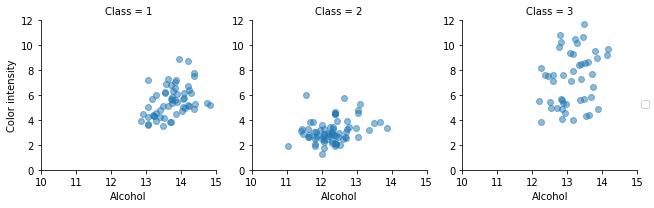

In [65]:
kws = dict(s=80, linewidth=.3, edgecolor="w")
g = sns.FacetGrid(df, col="Class", palette="Set1")
g = (g.map(plt.scatter, "Alcohol", "Color intensity", alpha=0.5).add_legend())
g.set(xlim=(10, 15))
g.set(ylim=(0, 12))

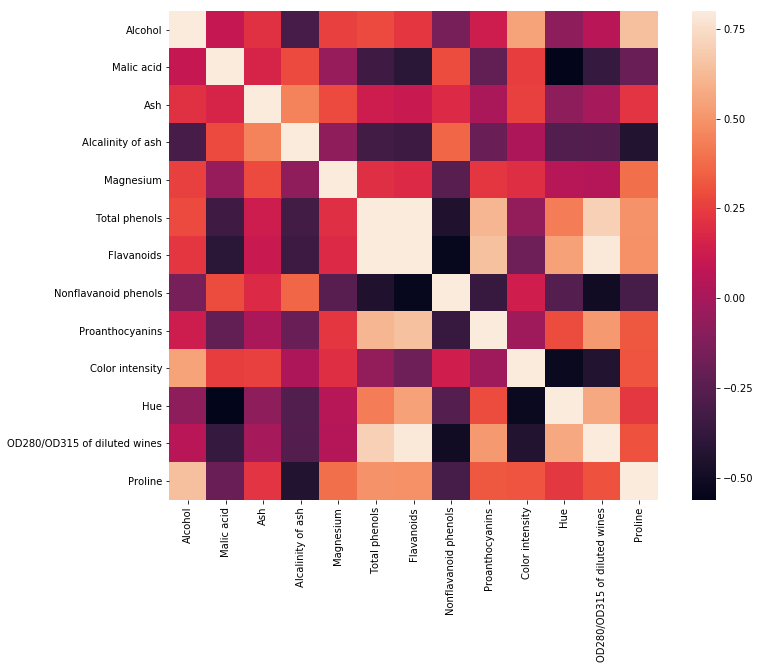

In [67]:
temp = df.drop("Class", axis=1)
corrmat = temp.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [25]:
# Take a subset of the data to make plots clearer.
df_class12 = df.loc[((df['Class'] == 1) | (df['Class'] == 2)), 
                     ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                      "Flavanoids","Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
              "OD280/OD315 of diluted wines", "Proline"]]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


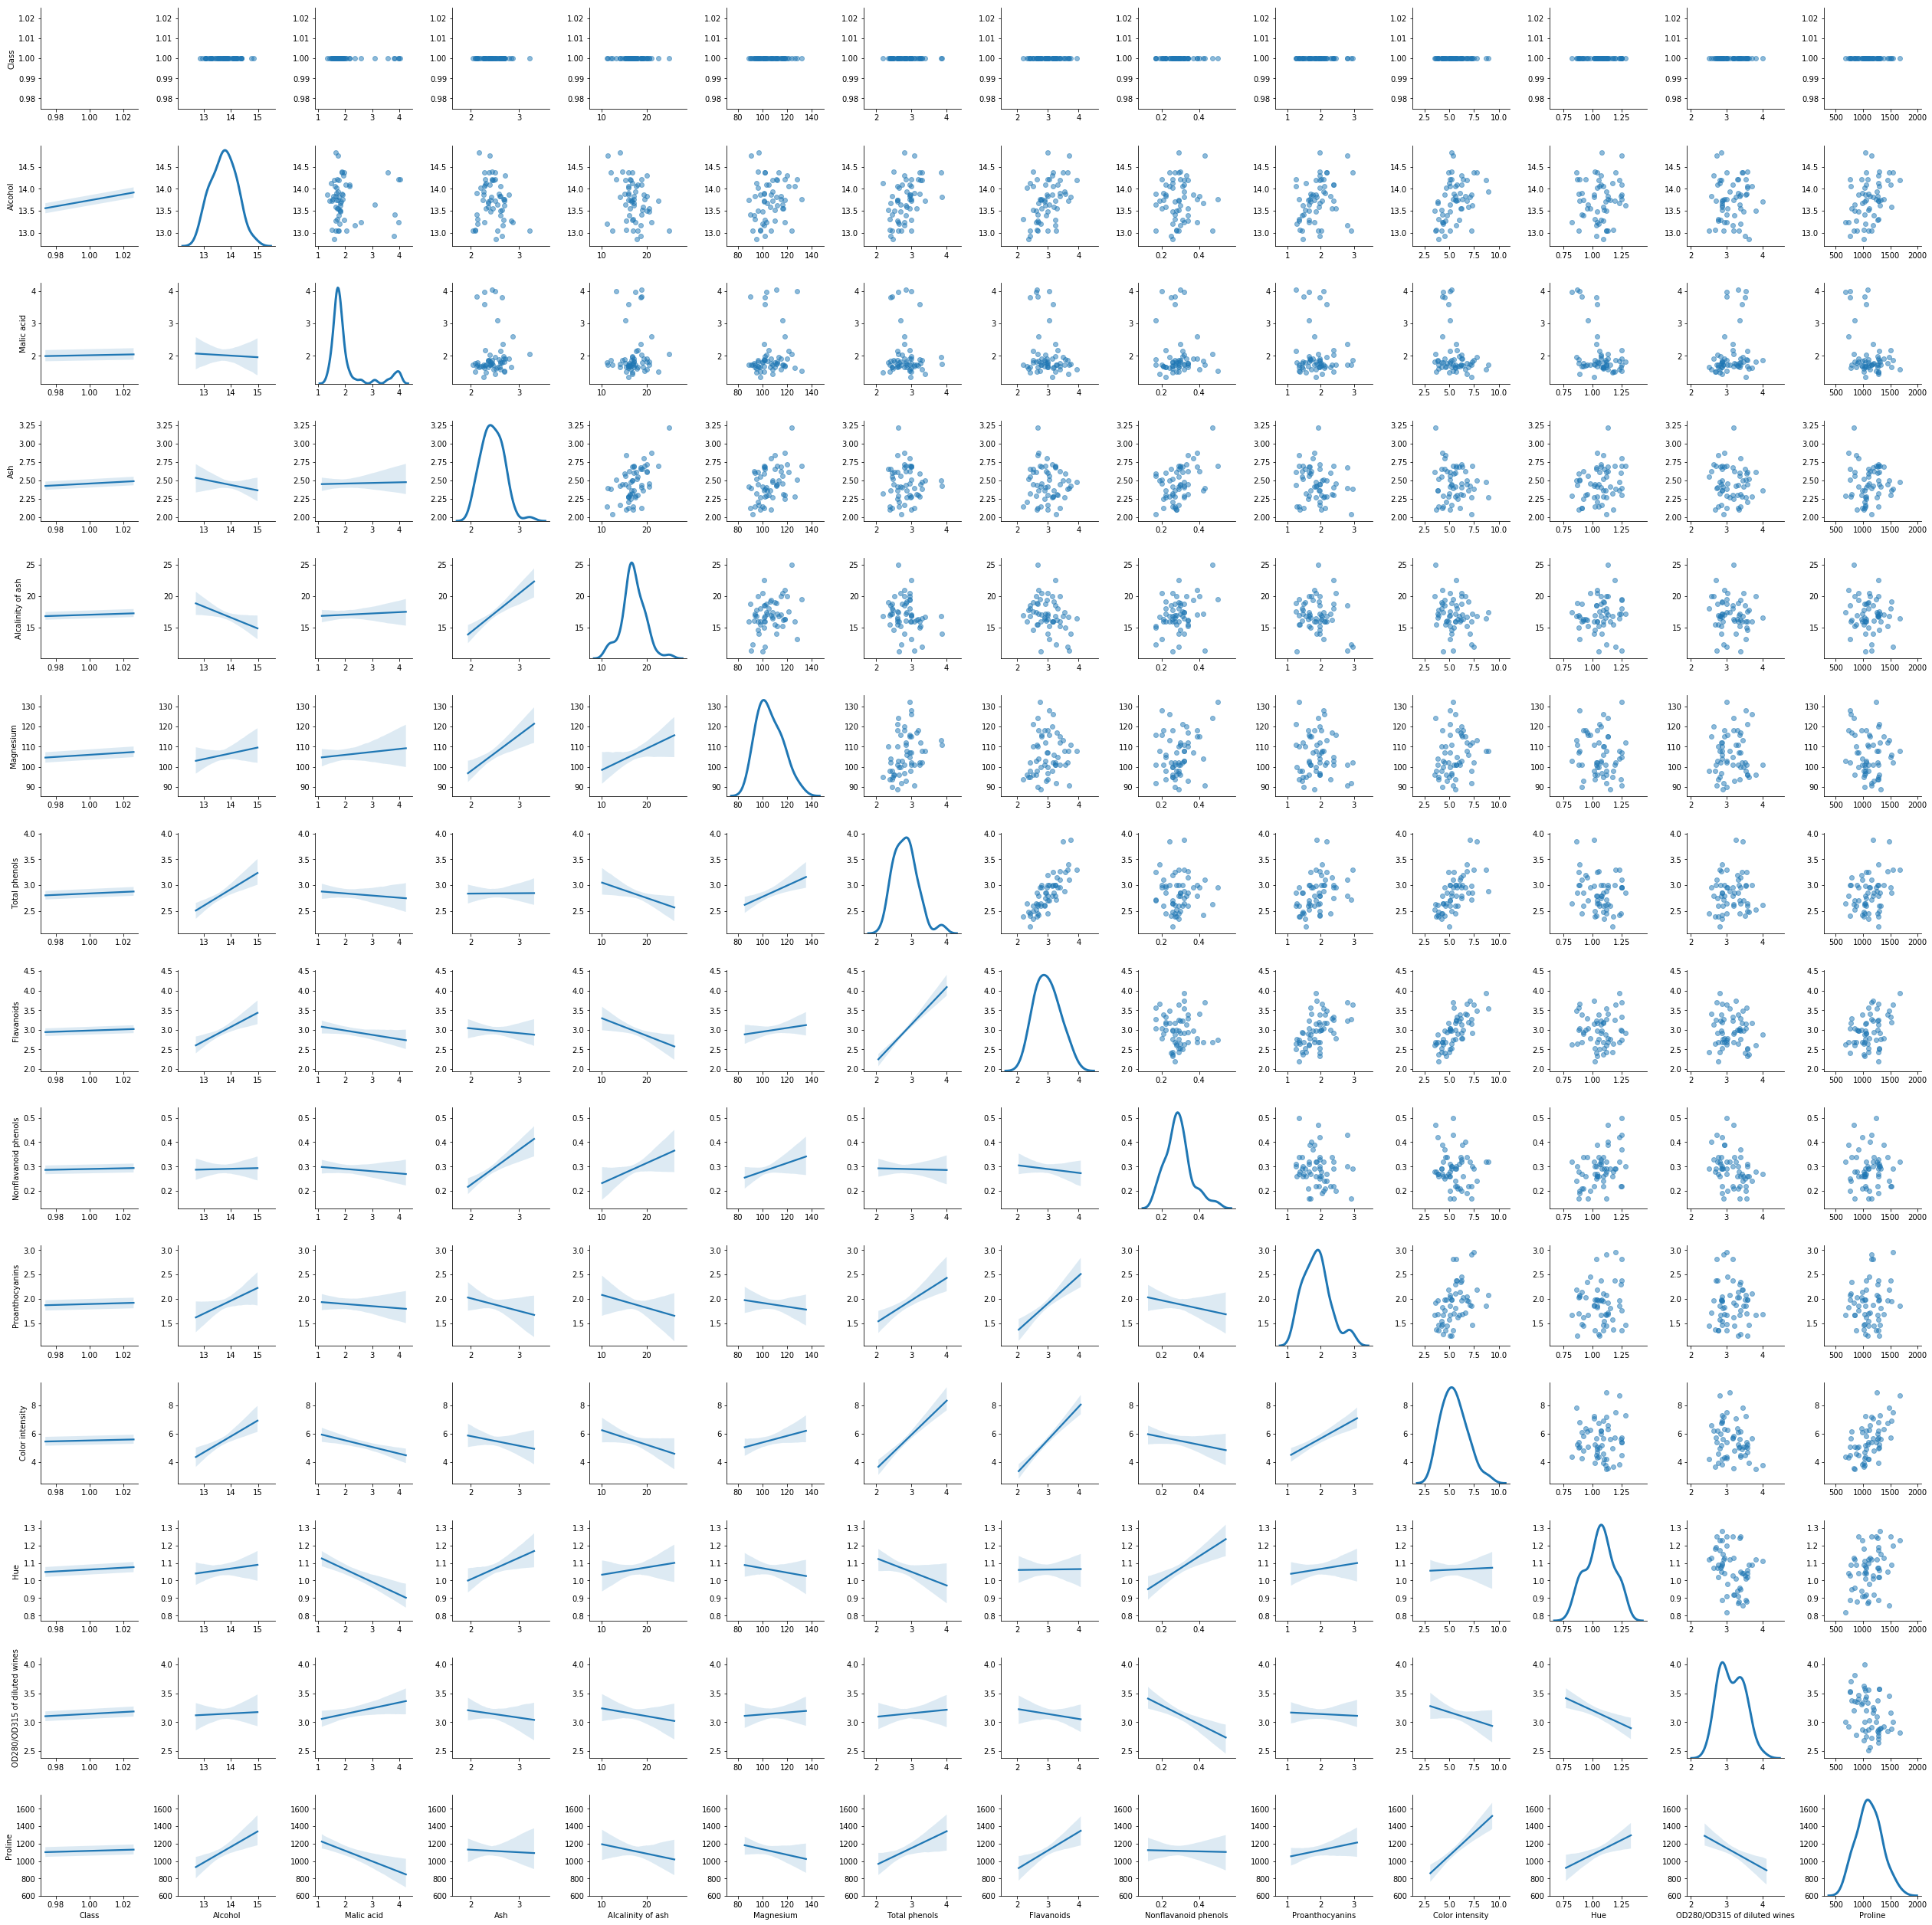

In [68]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df.loc[(df['Class'] == 1)].dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [84]:
features = pd.get_dummies(df['Class'])
features.columns = ['Class 1', 'Class 2', 'Class 3']
new_df = pd.concat([df, features], axis=1)
new_df = new_df.drop('Class', axis=1)
print(new_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    13.20        1.78  2.14               11.2        100           2.65   
1    13.16        2.36  2.67               18.6        101           2.80   
2    14.37        1.95  2.50               16.8        113           3.85   
3    13.24        2.59  2.87               21.0        118           2.80   
4    14.20        1.76  2.45               15.2        112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   OD280/OD315 of diluted wines  Proline  Class 1  Class 2  Cl

In [85]:
new_df['Magnesium'] = new_df['Magnesium']/1000
new_df['Proline'] = new_df['Proline']/1000

#Assume total solids include magnesium, ash, proline, flavanoids
solids = ['Magnesium', 'Ash', 'Proline', 'Flavanoids']
new_df['Total Solids'] = new_df[solids].sum(axis=1)
print(new_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    13.20        1.78  2.14               11.2      0.100           2.65   
1    13.16        2.36  2.67               18.6      0.101           2.80   
2    14.37        1.95  2.50               16.8      0.113           3.85   
3    13.24        2.59  2.87               21.0      0.118           2.80   
4    14.20        1.76  2.45               15.2      0.112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   OD280/OD315 of diluted wines  Proline  Class 1  Class 2  Cl

In [86]:
#Assume total liquids include Proanthocyanins, Malic Acid
liquids = ['Malic acid', 'Proanthocyanins']
new_df['Total Liquids'] = new_df[liquids].sum(axis=1)
print(new_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    13.20        1.78  2.14               11.2      0.100           2.65   
1    13.16        2.36  2.67               18.6      0.101           2.80   
2    14.37        1.95  2.50               16.8      0.113           3.85   
3    13.24        2.59  2.87               21.0      0.118           2.80   
4    14.20        1.76  2.45               15.2      0.112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   OD280/OD315 of diluted wines  Proline  Class 1  Class 2  Cl

In [88]:
new_df['Modified Ash'] = new_df['Ash'] * new_df['Alcalinity of ash']
new_df['Hue > 1'] = (new_df['Hue']>1).astype(int)
print(new_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    13.20        1.78  2.14               11.2      0.100           2.65   
1    13.16        2.36  2.67               18.6      0.101           2.80   
2    14.37        1.95  2.50               16.8      0.113           3.85   
3    13.24        2.59  2.87               21.0      0.118           2.80   
4    14.20        1.76  2.45               15.2      0.112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        2.76                  0.26             1.28             4.38  1.05   
1        3.24                  0.30             2.81             5.68  1.03   
2        3.49                  0.24             2.18             7.80  0.86   
3        2.69                  0.39             1.82             4.32  1.04   
4        3.39                  0.34             1.97             6.75  1.05   

   OD280/OD315 of diluted wines  Proline  Class 1  Class 2  Cl

In [93]:
new_df['Alcohol'].max() - new_df['Alcohol'].min()
print(new_df['Alcohol'].max())

14.83


In [96]:
#Find log of Malic Acid
new_df['Malic Acid'] = np.log(new_df['Malic acid'])
print(new_df.head())

   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    13.20        1.78  2.14               11.2      0.100           2.65   
1    13.16        2.36  2.67               18.6      0.101           2.80   
2    14.37        1.95  2.50               16.8      0.113           3.85   
3    13.24        2.59  2.87               21.0      0.118           2.80   
4    14.20        1.76  2.45               15.2      0.112           3.27   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
0        2.76                  0.26             1.28             4.38   
1        3.24                  0.30             2.81             5.68   
2        3.49                  0.24             2.18             7.80   
3        2.69                  0.39             1.82             4.32   
4        3.39                  0.34             1.97             6.75   

      ...      OD280/OD315 of diluted wines  Proline  Class 1  Class 2  \
0     ...               